# **Introduction: "Unraveling the Mysteries of Titanic's Missing Data"**

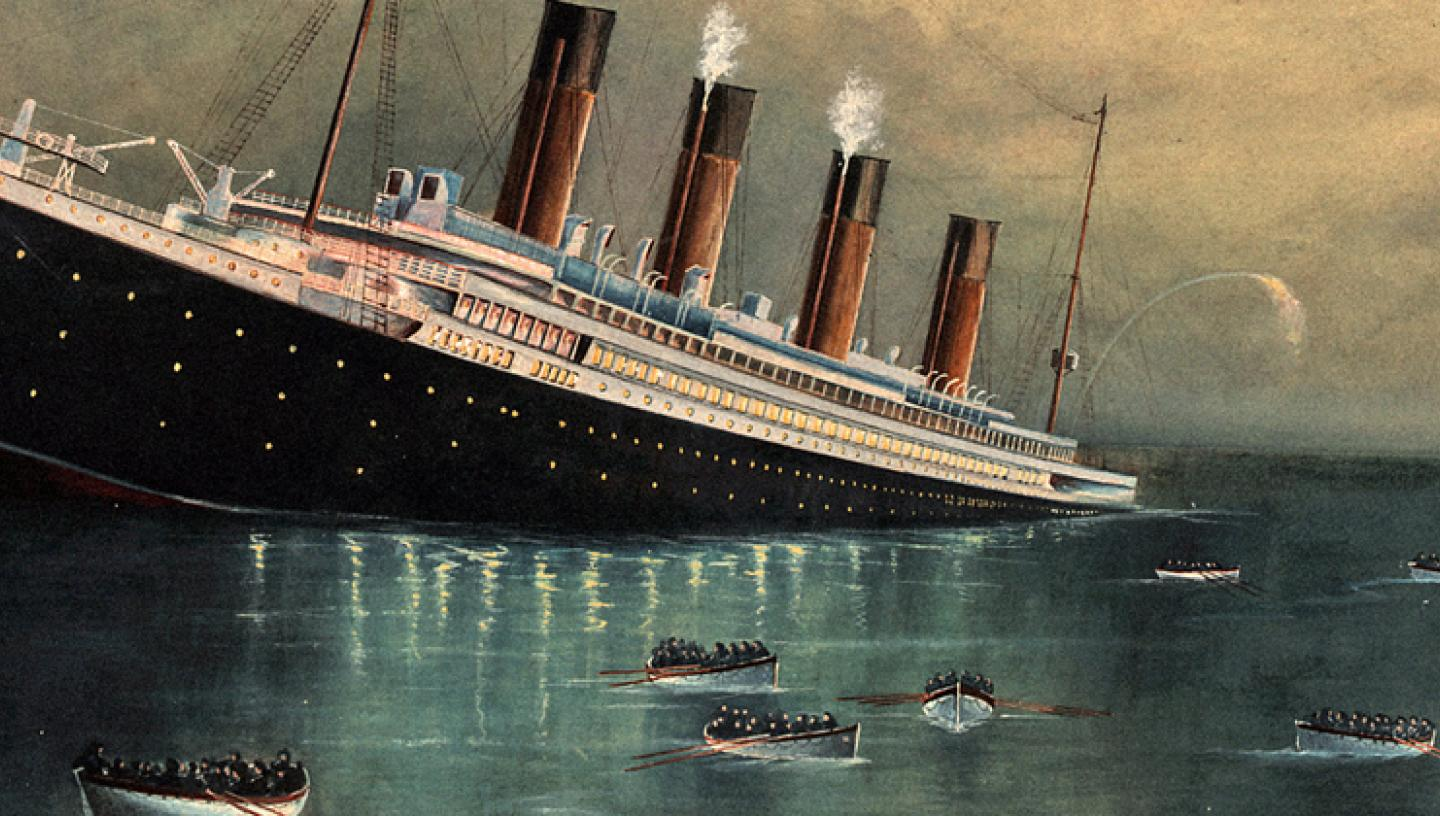


### **🚢 Welcome aboard, explorers!**

In this thrilling voyage through the Titanic dataset, we're setting sail to uncover the hidden secrets lurking within missing data.

* 🔍 The Titanic dataset isn't just a collection of numbers; it's a portal to the past, offering glimpses into the lives of those who sailed on the ill-fated voyage. But amidst the stories and statistics lie gaps, mysteries waiting to be solved.

* 🕵️‍♀️ Missing data isn't just an inconvenience; it's a puzzle begging to be deciphered. How do we handle these missing pieces? What tales do they hold, and how do they shape our understanding of history?

* 💡 In this notebook, we embark on a daring adventure to explore the complexities of missing values in the Titanic dataset. From the opulent cabins of first-class passengers to the cramped quarters of steerage, we'll navigate through the data, shedding light on the untold narratives obscured by missing information.

* 📊 Through dynamic visualizations, insightful analyses, and interactive discussions, we'll unravel the mysteries of missing data together. We'll dive into the heart of the dataset, uncovering patterns, trends, and anomalies that reveal the true essence of the Titanic's passengers.

* 🔍 Join us on this captivating journey as we confront the enigma of missing values head-on. Together, we'll unravel the mysteries of Titanic's missing data and unearth the stories that lay hidden beneath the surface.

* ⚓️ Let's set sail and explore the secrets of the Titanic's missing data!

- - - - - - -- - - -- - - - 


# **Titanic Dataset Description :**

🚢 The Titanic dataset is a captivating collection of data that offers a glimpse into one of the most iconic events in maritime history: the sinking of the RMS Titanic. This dataset, often used as a quintessential example in data analysis and machine learning, provides valuable insights into the passengers aboard the ill-fated voyage.

**🔍 Features:** 
--
The dataset comprises a variety of features that capture different aspects of the passengers' demographics, ticket details, and survival status. These features include:

* pclass: Passenger class (1st, 2nd, or 3rd).
* survived: Survival status (0 = No, 1 = Yes).
* name: Passenger's name.
* sex: Passenger's gender.
* age: Passenger's age.
* sibsp: Number of siblings or spouses aboard.
* parch: Number of parents or children aboard.
* ticket: Ticket number.
* fare: Passenger fare.
* cabin: Cabin number.
* embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
* boat: Lifeboat number (if survived).
* body: Body number (if not survived).
* home.dest: Home destination.

**📊 Purpose:**
--
The dataset serves as a treasure trove for data analysts, researchers, and enthusiasts seeking to uncover the stories and statistics behind the Titanic's passengers. It provides a rich source of information for exploring demographics, survival rates, and factors influencing passenger outcomes.

--------------------------
------------------

# **Step 1 : Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# to avoid warnings
import warnings 
warnings.filterwarnings('ignore')

/kaggle/input/titanic-dataset/Titanic Dataset.csv


-----------------
# **Step 2 : Read the Data**

In [2]:
# Raad the Data
titanic = pd.read_csv("/kaggle/input/titanic-dataset/Titanic Dataset.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


--------------
# **Step 3 : Explore the Data**

In [3]:
# Shape of Data
titanic.shape

(1309, 14)

In [4]:
# Information about data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
# Null value count 
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

###### This dataset has null values count for each feature in the Titanic dataset, highlighting the completeness and gaps in the data.
------------------

In [6]:
# Summary of data
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
survived,1309.0,NaN,NaN,NaN,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0
name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Step 4 : Visulization of Missing Data in Titanic Dataset**

-----------------

# **4.1 Bar Plot : Missing Values in Titanic dataset**

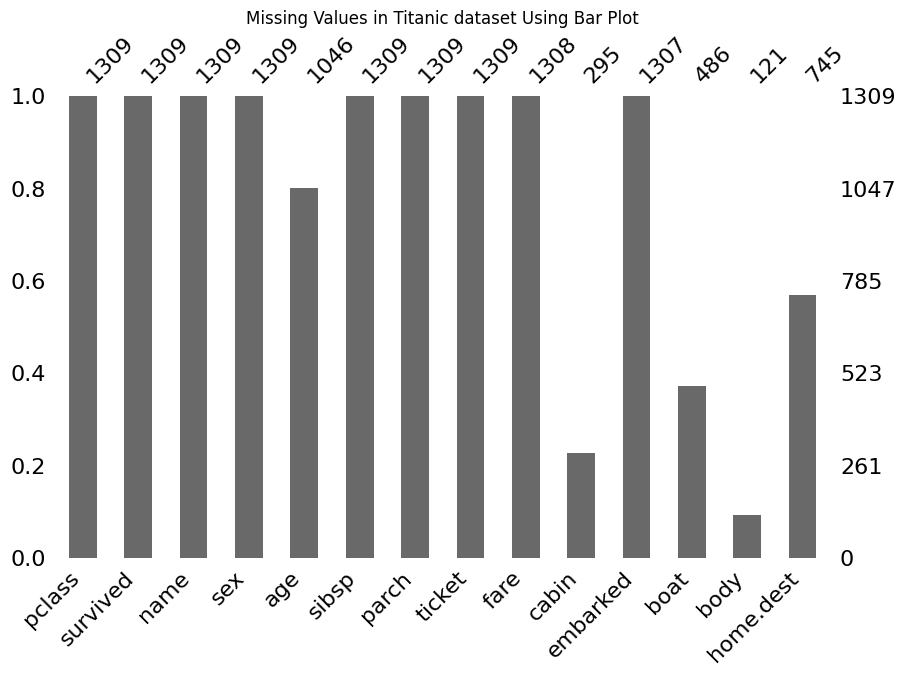

In [7]:
# Checking null values using barchart
msno.bar(titanic,figsize=(10,6))
plt.title("Missing Values in Titanic dataset Using Bar Plot")
plt.show();

## **Interpretation of the chart:**

* The "age" feature has a relatively short bar, indicating a significant proportion of missing values.
* The "cabin" feature also has a shortest bar, suggesting a large number of missing values for this feature as well.
* Other features such as "fare", "embarked", "body", and "home.dest" also have missing values, but the bars are relatively tallerer compared to "body" and "cabin".

--------------------

# **4.2 Matrix :  Relationships between missing values across different features**

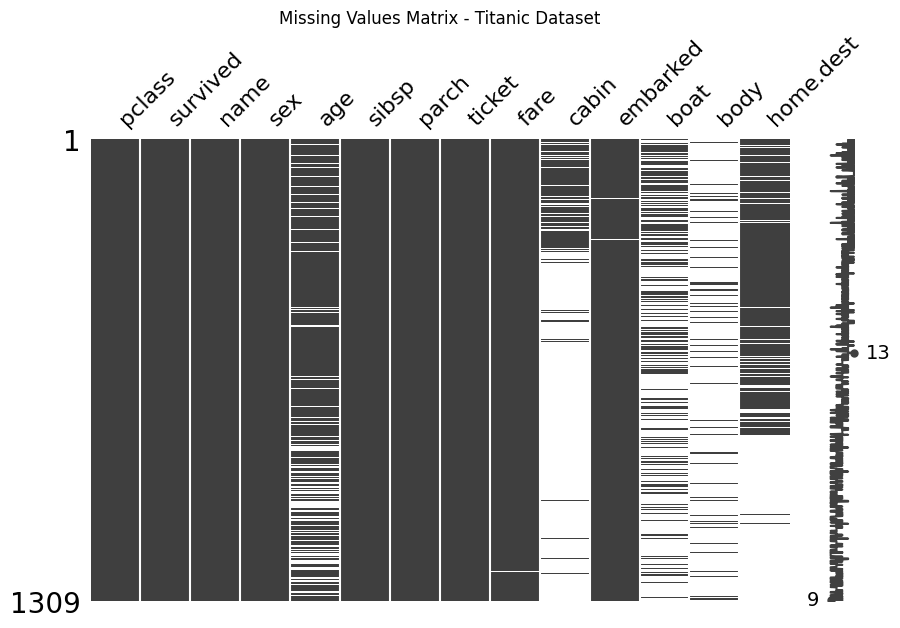

In [8]:
# Visualize missing values using missingno
msno.matrix(titanic,figsize=(10, 6))
plt.title('Missing Values Matrix - Titanic Dataset')
plt.show();

* **White Lines :** The white lines in the matrix represent missing values. Each horizontal line corresponds to a particular data point (passenger), and each vertical line corresponds to a specific feature.

* **Dark Grey Sections :** The dark blue sections indicate the presence of non-missing values. In other words, areas without white lines represent data that is present in the dataset.

## **Interpretation of the matrix :**

1. You can observe patterns of missingness across different features. For example, if there are consecutive white lines in a specific column (feature), it indicates a continuous stretch of missing values for that feature across multiple data points.

2. Patterns of missingness can also be observed across rows (data points). If there are consecutive white lines in a specific row, it indicates missing values for multiple features for that particular data point (passenger).

3. The visualization helps identify potential relationships or correlations between missing values across different features. For instance, missing values in one feature might coincide with missing values in another feature, suggesting a potential relationship between those variables.

Overall, the missing values matrix provides a comprehensive overview of missing data patterns in the Titanic dataset, facilitating the identification of missingness trends and guiding subsequent data preprocessing steps.

--------------

# **4.3 Heatmap : Correlation between Missing Values**

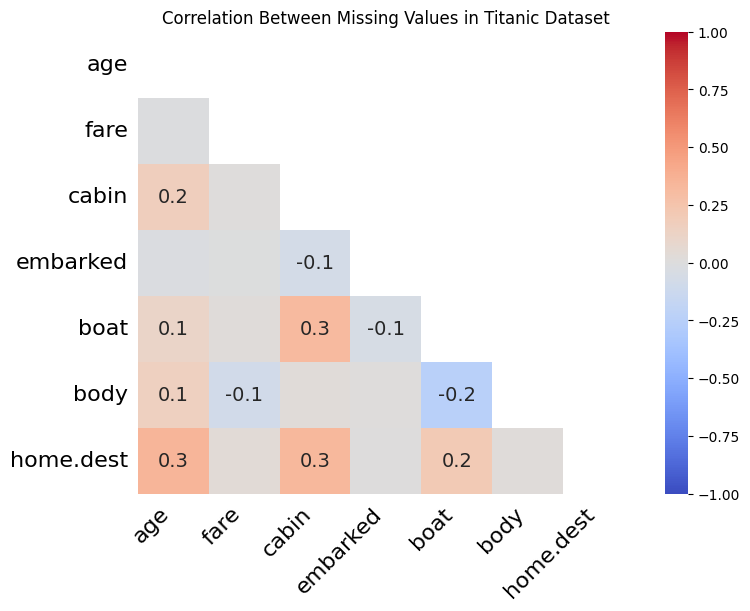

In [9]:
# Correlation between missing data 
msno.heatmap(titanic,cmap='coolwarm',figsize=(8,6))
plt.title("Correlation Between Missing Values in Titanic Dataset")
plt.show();


**1. Color Gradient :** The heatmap uses a color gradient to represent the correlation between missing values across different pairs of features. Darker colors indicate a stronger positive correlation, while lighter colors  indicate a weaker correlation or no correlation.


**2. Off-Diagonal Cells:** Off-diagonal cells represent the correlation between missing values for pairs of features. A higher value (closer to 1) indicates a stronger positive correlation, meaning that when one feature has missing values, the other feature is also likely to have missing values.

## **Interpretation of the heatmap :**

* Darker regions indicate pairs of features where missing values tend to co-occur more frequently, suggesting a stronger positive correlation.

* Lighter regions indicate pairs of features where missing values are less likely to co-occur, suggesting a weaker or no correlation between missing values for those features.

The heatmap provides insights into potential relationships or dependencies between missing values across different features, which can inform strategies for handling missing data, such as imputation or deletion.

-------------------------------

# **4.4 Bar Plot : Distribution of Missing Data**

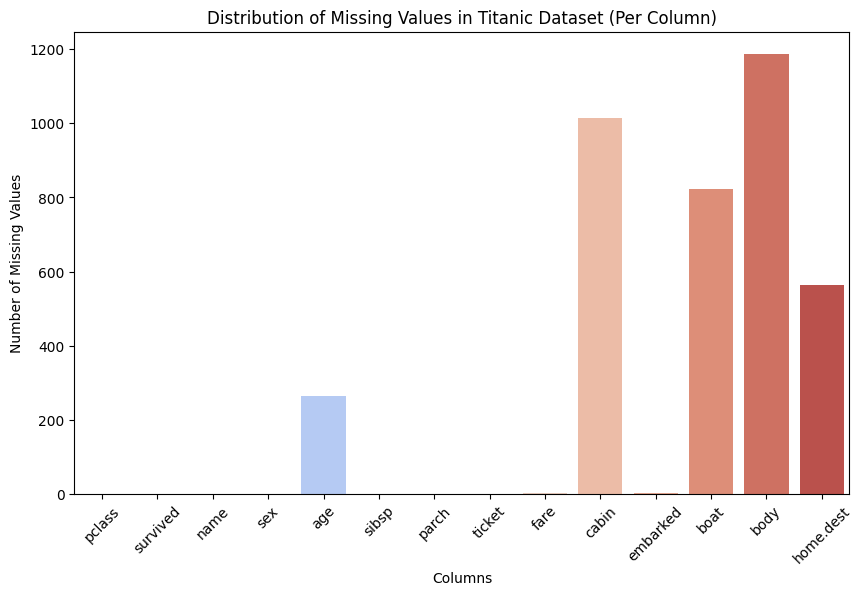

In [10]:
# Count missing values per column
missing_count =titanic.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_count.index, y=missing_count.values, palette="coolwarm")
plt.title('Distribution of Missing Values in Titanic Dataset (Per Column)')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show();

**1. X-axis (Columns):** The x-axis represents the columns (features) in the Titanic dataset. Each bar corresponds to a specific feature.

**2. Y-axis (Number of Missing Values):** The y-axis represents the number of missing values for each feature. The height of each bar indicates the count of missing values for the corresponding feature.

**3. Bar Colors:** The color of each bar is determined by the palette "coolwarm", where cooler colors (e.g., blue) indicate a smaller number of missing values, and warmer colors (e.g., red) indicate a larger number of missing values.

## **Interpretation of the chart:**

*  Features with taller bars have a larger number of missing values, indicating a higher proportion of missing data for those features.

* Features with shorter bars have a smaller number of missing values, indicating a lower proportion of missing data.

* The chart provides a quick overview of the distribution of missing values across different features in the Titanic dataset, allowing you to identify which features have the most missing data.

This visualization can help guide decisions on how to handle missing values during data preprocessing, such as imputation or deletion, based on the severity of missingness in each feature.

----------

# **4.5 Pie Chart : Percentage of Missing data**

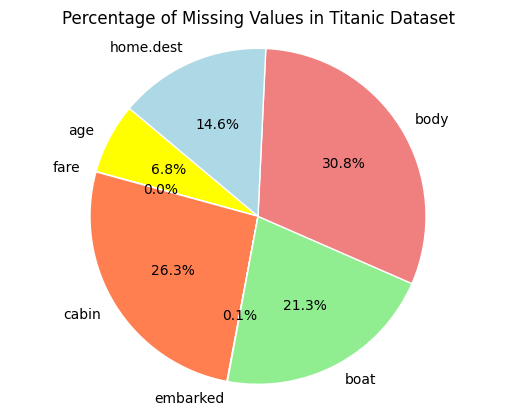

In [11]:
# Calculate percentage of missing values
missing_percentage = missing_count / len(titanic) * 100

# Drop columns with no missing values for better visualization
missing_percentage = missing_percentage[missing_percentage > 0]


# custom colors
custom_colors = ['yellow','blue', 'coral', 'purple','lightgreen', 'lightcoral','lightblue']

# Create a pie chart of Missing Values

plt.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops={'edgecolor': 'white'})
plt.title('Percentage of Missing Values in Titanic Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie chart visualizes the percentage of missing values for each column (feature) in the Titanic dataset. Here's how to interpret the chart:

**1. Pie Slices:** Each slice of the pie represents a column (feature) in the Titanic dataset that contains missing values. The size of each slice corresponds to the percentage of missing values for the respective feature.

**2. Labels :** The labels around the pie slices indicate the names of the features with missing values.

**3. Percentage:** The percentage value displayed on each slice represents the proportion of missing values relative to the total number of entries in the dataset.

## **Interpretation of the chart:**

* The pie chart provides a visual breakdown of the distribution of missing values across different features in the Titanic dataset.

* Larger slices indicate features with a higher percentage of missing values, while smaller slices indicate features with a lower percentage of missing values.

* By examining the chart, you can quickly identify which features contribute the most to the overall missingness in the dataset.

* This visualization can help prioritize data cleaning efforts and inform decisions on how to handle missing values for each feature during data preprocessing.

Overall, the pie chart offers a concise summary of the extent of missing data within the Titanic dataset, allowing for easy identification of features that may require special attention during data analysis and modeling.

---------------

# **4.6 Histogram : Age Distribution(with or without missing values)**

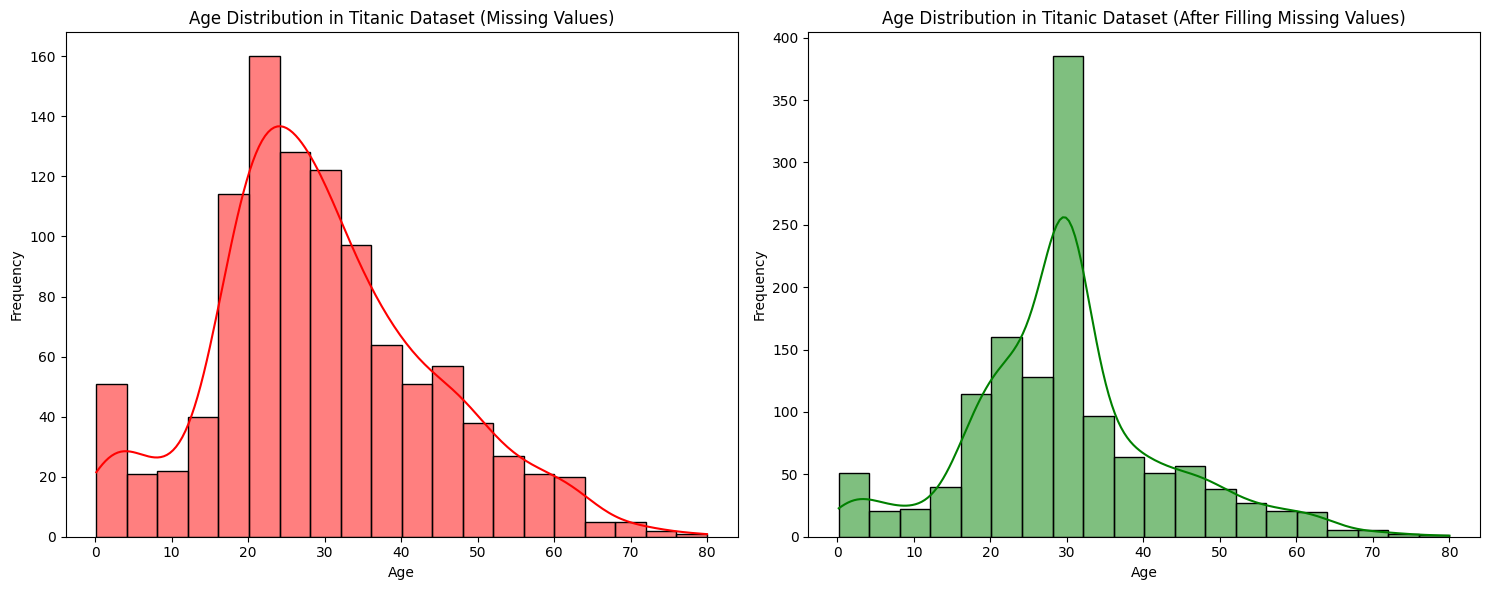

In [12]:
# Histplot
plt.figure(figsize=(15,6))
# Before filling missing values
plt.subplot(1,2,1)
sns.histplot(titanic['age'], bins=20, kde=True, color='red')
plt.title('Age Distribution in Titanic Dataset (Missing Values)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Filling Missing Values in Age column
mean_age = titanic['age'].mean().round()
titanic['age'].fillna(mean_age,inplace=True)

# After filling missing values
plt.subplot(1,2,2)

sns.histplot(titanic['age'], bins=20, kde=True, color='green')
plt.title('Age Distribution in Titanic Dataset (After Filling Missing Values)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

## **Interpretation of both distribution :**

**1. Before Filling Missing Values (Left Plot):**

The left plot shows the distribution of ages in the dataset when missing values are present.
The distribution appears to be slightly right-skewed, with more passengers concentrated in younger age groups.
The density curve (kde) suggests a peak around the late teens to early twenties, indicating a relatively higher frequency of younger passengers.

**2. After Filling Missing Values (Right Plot):**

The right plot displays the distribution of ages in the dataset after missing values have been filled.
The distribution now appears more symmetric and slightly shifted towards the mean age.
With the missing values filled using the mean age (approximately 30 years), the distribution is adjusted to have a peak around the mean age.

-------------------------------
## Mean and Standard Deviation:

### Before Filling Missing Values:

**Mean :** Approximately 29.88

**Standard Deviation:** Approximately 14.41

### After Filling Missing Values:

**Mean :** Approximately 29.91

**Standard Deviation:** Approximately 12.88

------------------------------------------
## Distribution Type:
Based on the mean and standard deviation, both distributions have a similar mean around 30 years. The standard deviation decreases slightly after filling missing values.

**'Before Filling Missing Values':** 

-The distribution is slightly right-skewed due to the longer tail towards older ages, as indicated by a higher standard deviation.


**'After Filling Missing Values' :** 

-The distribution is slightly less skewed and appears closer to a normal distribution, with a narrower spread of data around the mean.

Overall, filling missing values in the "Age" feature has shifted the distribution closer to normality, reducing the skewness observed in the original distribution with missing values.


----------------------------------

# **4.7 Count Plot : Embarked Distribution**

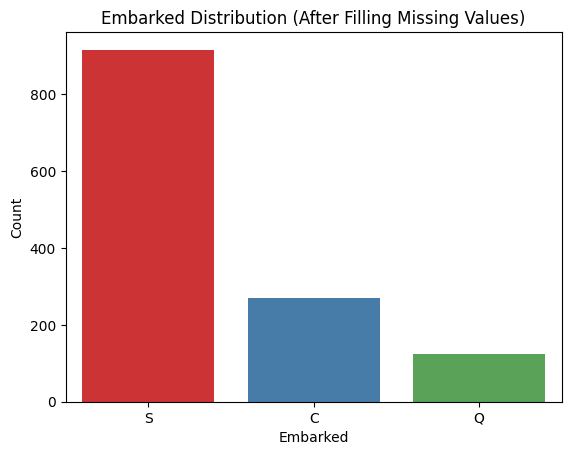

In [13]:
# Fill missing values in 'embarked' column
most_common_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(most_common_embarked, inplace=True)

# Visualize 'embarked' column after filling missing values

sns.countplot(data=titanic, x='embarked', palette='Set1')
plt.title('Embarked Distribution (After Filling Missing Values)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show();


The visual and code provided visualize the distribution of the 'embarked' column in the Titanic dataset before and after filling missing values.

## **Interpretation of the chart :**

### Visualization Interpretation:

The bar plot visualizes the distribution of passengers across different embarkation ports (C = Cherbourg, Q = Queenstown, S = Southampton) after filling the missing values.

* Each bar represents the count of passengers who embarked from a particular port.
* The plot illustrates the relative frequency of passengers embarking from each port after filling the missing values.

* The mode value (most common embarkation port) is used to fill the missing values, so the bar representing the mode port will likely be taller than the others, indicating that it is the most common embarkation port.


**The code utilizes the mode (most common value) of the 'embarked' column to fill the missing values.
This approach is suitable for categorical data like embarkation ports, where the mode represents the most frequent category in the dataset.
By filling missing values with the mode, we aim to preserve the distributional characteristics of the data while ensuring completeness.**


Overall, the visual and code effectively demonstrate the impact of filling missing values with the mode on the distribution of embarkation ports in the Titanic dataset, ensuring a comprehensive and accurate analysis.

--------------

# **4.8 Bar Plot : Top 5 Frequent Home Destinations**

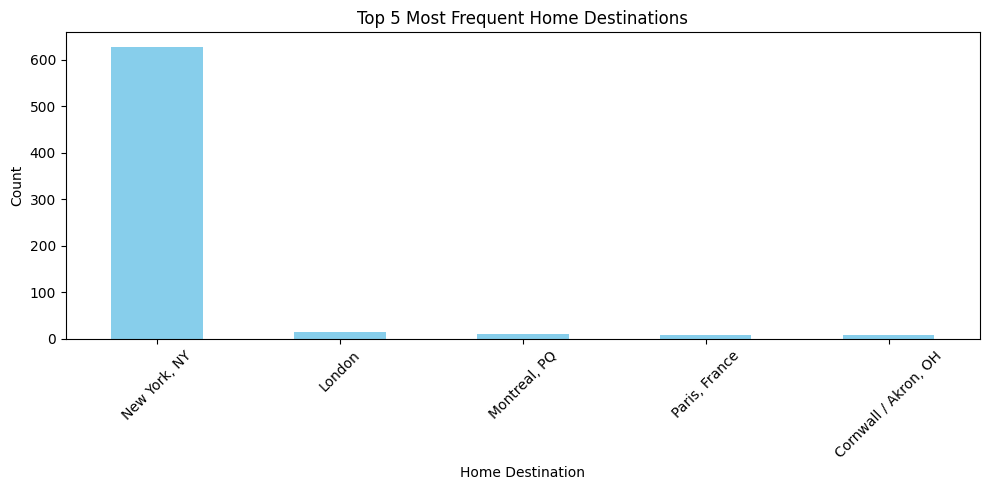

In [14]:
# Fill missing values in 'embarked' column
most_common_dest = titanic['home.dest'].mode()[0]
titanic['home.dest'].fillna(most_common_dest, inplace=True)

# Value counts of 'home.dest' column
home_dest_counts = titanic['home.dest'].value_counts().head(5)  # Consider only top 5 most frequent destinations

# Plotting
plt.figure(figsize=(10, 5))
home_dest_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Frequent Home Destinations')
plt.xlabel('Home Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## **Interpretation of Chart**
The bar chart visualizes the top 5 most frequent home destinations of Titanic passengers after filling missing values in the 'home.dest' column. Here's the interpretation:

**1. Home Destination :** Each bar represents a home destination (e.g., city or country) where passengers were headed or where they had their final destination.

**2. Count :** The height of each bar indicates the count of passengers associated with the respective home destination. A taller bar represents a higher frequency of passengers having that destination.

------------------
#### Top 5 Destinations: The chart focuses on the top 5 most frequent home destinations among Titanic passengers



**X-axis Labels:** The x-axis labels display the names of the top 5 home destinations.

**Y-axis:** The y-axis represents the count of passengers associated with each home destination.

This visualization allows for quick identification of the most prevalent home destinations among Titanic passengers after filling missing values. It provides insights into the distribution of passenger destinations and helps understand the demographics or travel patterns within the dataset.

---



# **4.9 Box Plot : Distribution of Numerical Features in Titanic**

In [15]:
# Filling missing values in Fare column with mode
most_common_fare = titanic['fare'].mode()[0]
titanic['fare'].fillna(most_common_fare, inplace=True)

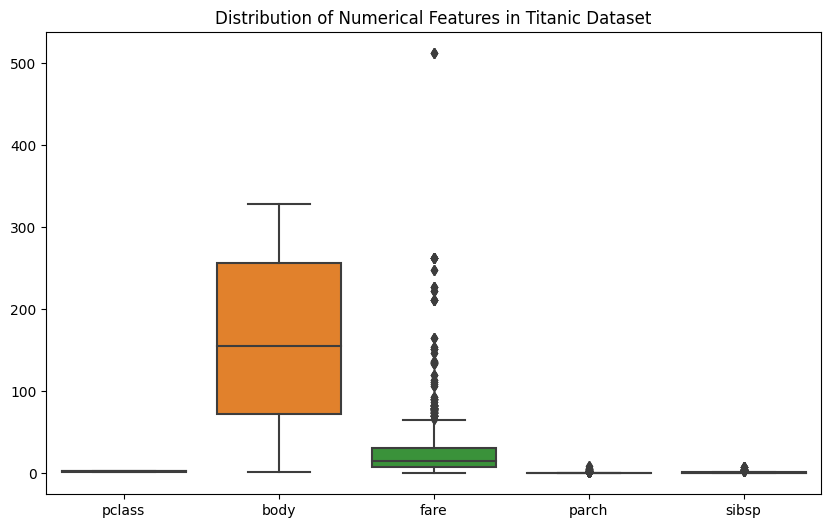

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(titanic[['pclass','body','fare','parch','sibsp']])
plt.title("Distribution of Numerical Features in Titanic Dataset")
plt.show();


The box plot visualizes the distribution of numerical variables 'pclass', 'body', 'fare', 'parch', and 'sibsp' in the Titanic dataset.

## Interpretation of the chart :

**1. pclass:** This box plot shows the distribution of ticket classes among passengers. The box represents the interquartile range (IQR), with the horizontal line inside indicating the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles,

**2. body:** This box plot displays the distribution of body identification numbers of recovered passengers.

**3. fare:** This box plot illustrates the distribution of passenger fares. It provides insight into the range of fares paid by passengers, with the box indicating the IQR and the whiskers extending to 1.5 times the IQR. Outliers are represented as individual points.

**4. parch:** This box plot visualizes the distribution of the number of parents or children aboard the Titanic for each passenger.

**5. sibsp:** This box plot represents the distribution of the number of siblings or spouses aboard the Titanic for each passenger. 

Overall, the box plot provides a comprehensive overview of the distribution of numerical variables in the Titanic dataset, allowing for the identification of outliers and understanding the spread of data within each variable.

--------

In [17]:
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest       0
dtype: int64

--------------
# **Step 5 : "Deciphering Missing Data: Titanic Dataset Strategies"**

## 1] Deleting Rows with Missing Values:

### 1. Advantages:
Simple and straightforward approach.
Preserves the integrity of other data in the columns without missing values.
### 2. Disadvantages:
Loss of potentially valuable information from the deleted rows.
Reduction in the size of the dataset, which may impact the effectiveness of subsequent analysis or modeling.
### 3. Suitability:
Suitable when the number of rows with missing values is relatively small compared to the total dataset.
Appropriate if missing values occur randomly and do not represent systematic bias.

---------------------
## 2] Imputing Missing Values:

### 1. Advantages:
Retains all observations in the dataset.
Allows for the utilization of valuable information from other features to estimate missing values.
### 2. Disadvantages:
Imputation introduces uncertainty and potential bias into the dataset.
The accuracy of imputed values depends on the chosen imputation method and the underlying distribution of the data.
### 3. Suitability:
Suitable when the missing values follow a pattern or can be reasonably estimated from other available information.
Appropriate for maintaining the size and integrity of the dataset while dealing with missing values.


----------------------
## 3] Deleting Columns with Missing Values:

### 1. Advantages:
Simplifies the dataset by removing features with a significant amount of missing data.
Avoids potential biases introduced by imputation methods.
### 2. Disadvantages:
Loss of potentially valuable information contained in the deleted columns.
Reduction in the richness and complexity of the dataset, which may limit the scope of analysis or modeling.
### 3. Suitability:
Suitable when the columns with missing values are deemed irrelevant or redundant for the analysis.
Appropriate if the missing values in the columns are too extensive to impute or if the columns are not expected to contribute significantly to the analysis or modeling process.

-----------------

# **"Share Your Insights"**
Thank you for exploring this notebook on handling missing values in the Titanic dataset! We hope you found the analysis and strategies useful in understanding how to deal with missing data effectively.

Now, we invite you to share your insights and experiences with handling missing values:

* **Have you encountered similar challenges with missing data in your own projects or analyses?**
* **What strategies or techniques have you found most effective in dealing with missing values?**
* **Do you have any additional tips or best practices to share with the community?**

Your contributions are valuable and can help enrich our understanding of this topic. Feel free to leave your thoughts, questions, or suggestions in the comments section below.

And if you found this notebook helpful, don't forget to upvote it to support our work and help others discover it!


#### **-----------------------------Thank you for your participation and happy analyzing!------------------------------------------**














------------------------------